In [1]:
import pandas as pd

In [4]:
file_path = "./canada_merged_data.csv"

canada = pd.read_csv(file_path)
canada.info()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18880\2868558286.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  canada = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8288794 entries, 0 to 8288793
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   latitude     float64
 1   longitude    float64
 2   brightness   float64
 3   scan         float64
 4   track        float64
 5   acq_date     object 
 6   acq_time     int64  
 7   satellite    object 
 8   instrument   object 
 9   confidence   object 
 10  version      object 
 11  bright_t31   float64
 12  frp          float64
 13  daynight     object 
 14  type         float64
 15  YEAR         float64
 16  DOY          float64
 17  T2M          float64
 18  WS2M         float64
 19  RH2M         float64
 20  PRECTOTCORR  float64
dtypes: float64(14), int64(1), object(6)
memory usage: 1.3+ GB


In [5]:
# 🔹 날짜 변환
# 산불이 번지는 패턴을 분단위로 확인해볼 필요가 있을것같아서 datatime으로 날짜와시간을 합쳤다.
canada["datetime"] = pd.to_datetime(canada["acq_date"] + " " + canada["acq_time"].astype(str).str.zfill(4), format="%Y-%m-%d %H%M")

In [ ]:
canada

In [6]:
# weather데이터(2025-02-28)와 산불데이터(2025-3-16)를 merge(how=left)하면서 
# wheather데이터의 중간에 비어버리는 날짜에 null값을
# 결측치로 처리하기 위해서 데이터는 2025-02-28일부터 사용할 것이다. 
canada[canada["acq_date"] == "2025-03-01"]

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,type,YEAR,DOY,T2M,WS2M,RH2M,PRECTOTCORR,datetime
8287502,56.17064,-113.07836,321.36,0.39,0.36,2025-03-01,945,N,VIIRS,n,...,2.97,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01 09:45:00
8287503,56.32063,-121.40752,301.49,0.41,0.45,2025-03-01,945,N,VIIRS,n,...,0.99,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01 09:45:00
8287504,56.32011,-121.40078,299.28,0.41,0.45,2025-03-01,945,N,VIIRS,n,...,0.99,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01 09:45:00
8287505,55.70971,-119.81181,297.63,0.54,0.42,2025-03-01,945,N,VIIRS,n,...,0.61,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01 09:45:00
8287506,55.63855,-119.85990,295.51,0.54,0.42,2025-03-01,945,N,VIIRS,n,...,0.92,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01 09:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8287653,49.28911,-122.95018,296.14,0.39,0.36,2025-03-01,1010,N20,VIIRS,n,...,0.37,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01 10:10:00
8287654,50.89531,-121.77180,327.58,0.39,0.36,2025-03-01,1010,N20,VIIRS,n,...,3.02,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01 10:10:00
8287655,50.61380,-119.65865,301.34,0.39,0.36,2025-03-01,1010,N20,VIIRS,n,...,0.54,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01 10:10:00
8287656,54.42517,-117.77339,303.80,0.79,0.78,2025-03-01,1146,N20,VIIRS,n,...,3.40,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01 11:46:00


In [7]:
canada= canada.loc[:8287501]

In [8]:
canada.head(20)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,type,YEAR,DOY,T2M,WS2M,RH2M,PRECTOTCORR,datetime
0,43.27457,-79.79796,340.37,0.39,0.59,2015-01-01,633,N,VIIRS,n,...,2.74,N,3.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
1,50.66671,-120.73180,304.51,0.53,0.67,2015-01-01,1133,N,VIIRS,n,...,1.86,N,0.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 11:33:00
2,50.66734,-120.72754,311.48,0.53,0.67,2015-01-01,1133,N,VIIRS,n,...,1.80,N,0.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 11:33:00
3,49.90158,-124.25547,301.94,0.45,0.47,2015-01-01,954,N,VIIRS,n,...,0.72,N,0.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 09:54:00
4,43.26389,-79.80871,320.93,0.39,0.59,2015-01-01,633,N,VIIRS,n,...,4.97,N,2.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
5,42.80918,-80.09424,297.96,0.40,0.60,2015-01-01,633,N,VIIRS,n,...,0.86,N,0.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
6,43.27477,-79.80285,297.73,0.39,0.59,2015-01-01,633,N,VIIRS,n,...,2.74,N,3.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
7,42.80399,-80.10481,320.20,0.40,0.60,2015-01-01,633,N,VIIRS,n,...,2.74,N,0.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
8,42.80378,-80.09975,308.10,0.40,0.60,2015-01-01,633,N,VIIRS,n,...,1.34,N,0.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
9,42.80359,-80.09471,297.19,0.40,0.60,2015-01-01,633,N,VIIRS,n,...,1.34,N,0.0,2015.0,1.0,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00


In [10]:
# 'YEAR', 'DOY', 'acq_time' : datetime 컬럼 추가 예정으로 컬럼 중복 삭제
# scan : 데이터 스캔 번호, 예측과 직접적인 관련이 적음
# track : 추적 번호, 예측과 직접적인 관련이 적음
# satellite : 산불 관측 위성 정보, 예측과 관련이 적음
# instrument : 사용된 센서 종류, 예측에 큰 영향을 미치지 않음
# version : 데이터 버전 정보, 예측과 관련 없음
# type : 산불 유형, 예측 모델과 직접적인 관계가 없음
# 위와 같은 이유로 컬럼 삭제함

canada.drop(columns=["scan","track","satellite","instrument","version","acq_time","YEAR","DOY","type"],inplace=True)

In [11]:
# 결측치 제거됨
canada.isnull().sum()

latitude       0
longitude      0
brightness     0
acq_date       0
confidence     0
bright_t31     0
frp            0
daynight       0
T2M            0
WS2M           0
RH2M           0
PRECTOTCORR    0
datetime       0
dtype: int64

In [14]:
### 시각화 라이브러리 정의
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

### 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

In [12]:
canada.describe()

,latitude,longitude,brightness,bright_t31,frp,T2M,WS2M,RH2M,PRECTOTCORR,datetime
count,8.287502e+06,8.287502e+06,8.287502e+06,8.287502e+06,8.287502e+06,8.287502e+06,8.287502e+06,8.287502e+06,8.287502e+06,8287502
mean,5.706738e+01,-1.125106e+02,3.269285e+02,2.905137e+02,1.516150e+01,1.055459e+01,4.017807e-01,8.200875e+01,2.744245e+00,2022-02-15 14:13:51.598243584
min,4.175556e+01,-1.410045e+02,2.079300e+02,1.500000e+02,-1.900000e+00,-3.289000e+01,1.500000e-01,3.207000e+01,0.000000e+00,2015-01-01 06:33:00
25%,5.326698e+01,-1.215077e+02,3.069800e+02,2.835200e+02,1.850000e+00,8.460000e+00,2.900000e-01,7.543000e+01,7.000000e-02,2021-05-25 06:25:00
50%,5.744465e+01,-1.162651e+02,3.284800e+02,2.889100e+02,4.240000e+00,1.116000e+01,3.600000e-01,8.329000e+01,1.010000e+00,2023-06-22 07:02:00
75%,6.027610e+01,-1.066851e+02,3.433900e+02,2.967900e+02,1.135000e+01,1.379000e+01,4.600000e-01,8.964000e+01,4.300000e+00,2023-09-05 18:24:00
max,8.256747e+01,-5.266324e+01,3.670000e+02,3.893800e+02,4.191100e+03,2.489000e+01,2.770000e+00,1.000000e+02,5.852000e+01,2025-02-28 21:35:00
std,4.858302e+00,1.450461e+01,2.150227e+01,1.238891e+01,4.017066e+01,4.915502e+00,1.520005e-01,1.005294e+01,3.965309e+00,NaN


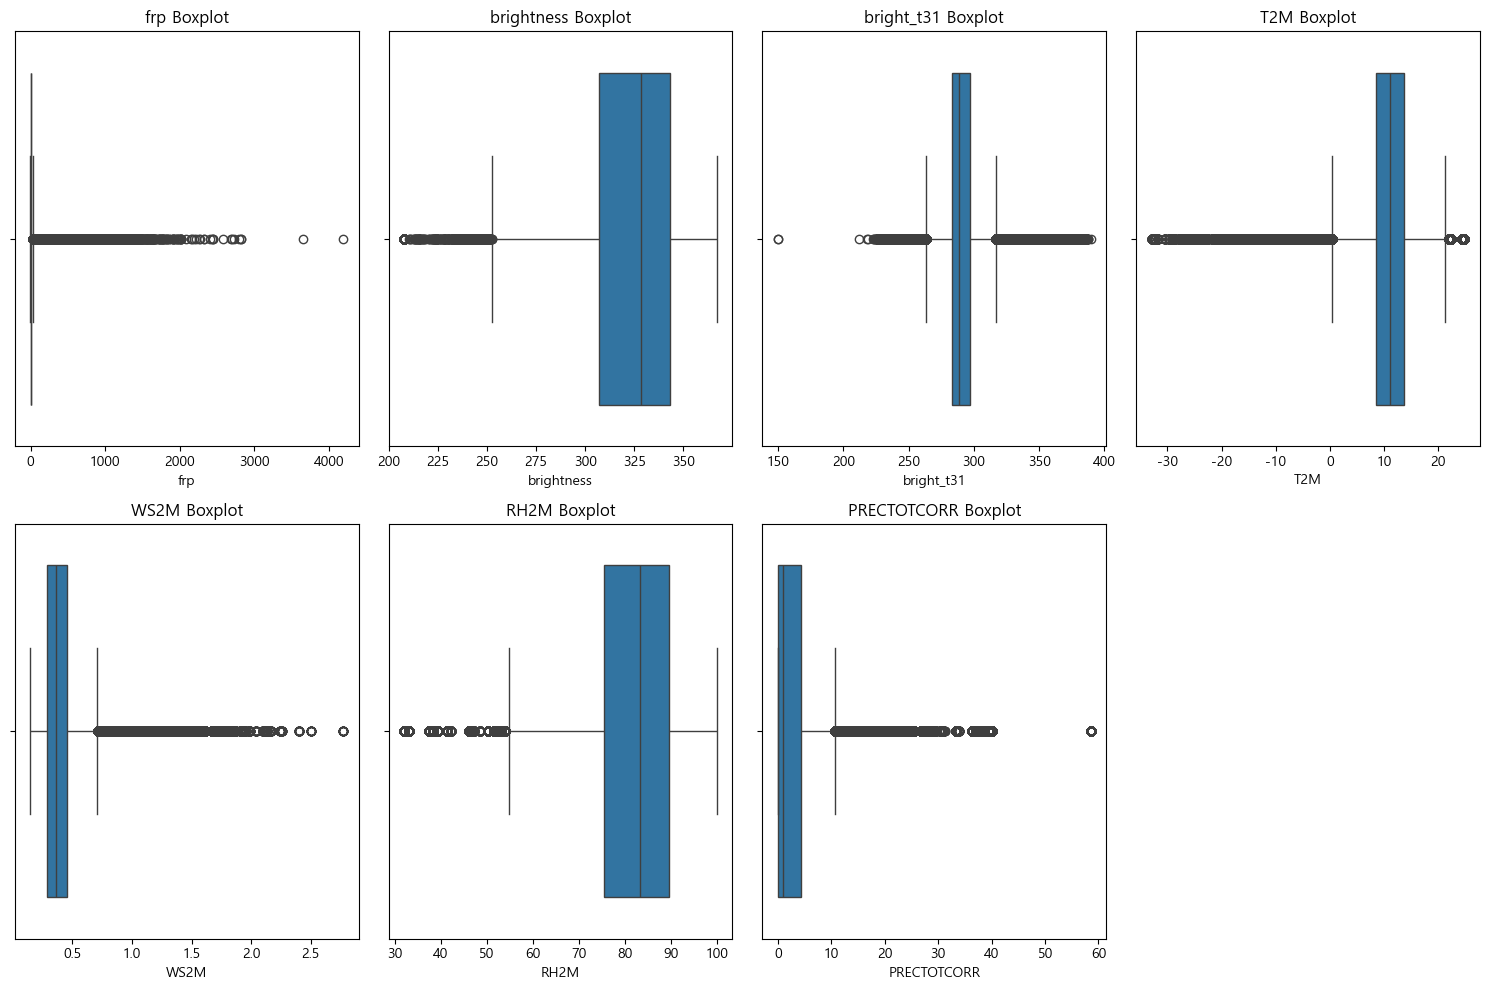

In [15]:
# 여러 변수에 대해 boxplot을 한 번에 그리기
plt.figure(figsize=(15, 10))

# 각 변수에 대해 Boxplot 생성
variables = ["frp", "brightness", "bright_t31", "T2M", "WS2M", "RH2M", "PRECTOTCORR"]
for i, v in enumerate(variables, 1):
    plt.subplot(2, 4, i) # 2행 4열
    sns.boxplot(x=canada[v])
    plt.title(f"{v} Boxplot")
    plt.xlabel(v)

plt.tight_layout()
plt.show()

In [ ]:
# 그래프로 확인해봤을때,
# "frp", "bright_t31", "T2M", "WS2M", "PRECTOTCORR" 약간의 이상치가 있어
# 데이터를 직접 확인하고 판단하는 과정을 거치겠다.

# 이상치데이터 frp(방사능) 데이터를 확인해 보기위해서,
# "frp"을 기준으로 오름차순 정리해본결과
#  2023-09-01 22:15:00 경에 무슨이유인진는 알수 없으나
# 방사능 수치가 굉장히 큰 불이 발생하였음을 확인하였다.
# 그러나 brightness, bright_t31 의값들도 매우 컸기 때문에 불이 심하게 난걸로 판단된다.
# 그러므로 이 수치는 이상치로 보지 않겠다.
canada.sort_values(by="frp", ascending=True)

,latitude,longitude,brightness,acq_date,confidence,bright_t31,frp,daynight,T2M,WS2M,RH2M,PRECTOTCORR,datetime
5611511,60.69232,-116.46225,208.00,2023-08-13,l,304.57,-1.90,D,12.56,0.29,91.40,1.20,2023-08-13 21:31:00
6490552,58.51508,-118.12811,367.00,2023-09-22,l,368.64,-0.20,D,6.30,0.32,94.38,1.21,2023-09-22 20:39:00
1394661,52.74782,-124.38033,367.00,2018-08-22,l,374.75,0.00,D,9.57,0.46,87.61,1.17,2018-08-22 21:46:00
7059815,60.75258,-117.82374,350.18,2024-07-18,n,304.79,0.00,D,16.68,0.44,69.75,0.02,2024-07-18 20:38:00
1718721,52.77389,-93.12326,367.00,2019-06-30,h,338.54,0.00,D,13.77,0.26,82.03,1.32,2019-06-30 19:14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122984,53.01764,-125.94685,356.54,2018-08-10,n,292.36,2795.01,N,12.36,0.36,81.17,0.26,2018-08-10 11:32:00
7282971,52.71067,-117.89853,367.00,2024-07-23,l,380.92,2824.71,D,7.67,0.31,87.07,10.10,2024-07-23 21:59:00
4099226,54.09672,-74.47459,207.93,2023-06-20,l,321.96,2827.69,D,12.37,0.46,68.17,0.35,2023-06-20 19:09:00
6103767,60.76542,-119.93785,208.00,2023-09-01,l,317.45,3648.99,D,11.57,0.42,83.77,0.04,2023-09-01 22:15:00


In [ ]:
# cconfidence의 특성 값 검색
canada["confidence"].unique()

array(['n', 'l', 'h'], dtype=object)

In [18]:
# "WS2M"(2미터 높이에서의 풍속)데이터를 확인해본결과 최대치 2.7
# 바람이 많이 부는 지역에서는 충분히 가능한 값으로 확인된다.
canada.sort_values(by="WS2M", ascending=True)

,latitude,longitude,brightness,acq_date,confidence,bright_t31,frp,daynight,T2M,WS2M,RH2M,PRECTOTCORR,datetime
6214255,58.28527,-120.55827,312.98,2023-09-05,n,268.81,2.42,N,5.62,0.15,94.06,5.46,2023-09-05 10:16:00
6215087,53.57127,-124.22421,343.91,2023-09-05,n,278.88,7.67,N,5.62,0.15,94.06,5.46,2023-09-05 09:27:00
6215086,53.57152,-124.23639,344.58,2023-09-05,n,275.11,12.82,N,5.62,0.15,94.06,5.46,2023-09-05 09:27:00
6215085,58.00493,-119.86128,318.39,2023-09-05,n,269.86,1.81,N,5.62,0.15,94.06,5.46,2023-09-05 10:16:00
6215084,53.72413,-125.95672,311.98,2023-09-05,n,279.00,2.61,N,5.62,0.15,94.06,5.46,2023-09-05 09:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558296,48.44318,-124.13164,326.01,2019-02-03,n,276.30,6.09,D,-29.69,2.77,98.70,0.04,2019-02-03 21:01:00
1558297,48.44397,-124.12650,344.39,2019-02-03,n,277.05,6.09,D,-29.69,2.77,98.70,0.04,2019-02-03 21:01:00
1558298,54.57391,-117.23634,325.82,2019-02-03,n,241.52,7.57,N,-29.69,2.77,98.70,0.04,2019-02-03 10:22:00
1558300,53.61407,-105.31455,325.26,2019-02-03,n,243.15,3.67,N,-29.69,2.77,98.70,0.04,2019-02-03 08:42:00


In [19]:
# "bright_t31" 불의 밝기 데이터 이상치 확인
canada.sort_values(by="bright_t31", ascending=True)

,latitude,longitude,brightness,acq_date,confidence,bright_t31,frp,daynight,T2M,WS2M,RH2M,PRECTOTCORR,datetime
2776139,57.97242,-98.56030,356.51,2021-08-04,l,150.00,17.80,D,14.01,0.30,90.42,7.70,2021-08-04 17:24:00
2776140,57.96919,-98.56802,356.44,2021-08-04,l,150.00,16.69,D,14.01,0.30,90.42,7.70,2021-08-04 17:24:00
2938666,55.79763,-126.49756,337.04,2021-10-19,n,212.23,0.09,N,-0.93,0.29,97.34,0.06,2021-10-19 12:09:00
372955,50.87170,-111.60602,343.25,2016-05-19,n,217.93,0.04,N,4.99,0.81,83.86,0.95,2016-05-19 10:36:00
1929775,65.05613,-113.96608,342.67,2019-11-15,n,218.73,0.04,N,0.41,0.35,99.04,8.67,2019-11-15 08:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805697,60.86393,-118.01683,367.00,2024-08-12,l,387.00,386.65,D,12.75,0.31,84.34,2.73,2024-08-12 20:46:00
7527067,60.79815,-118.36804,367.00,2024-08-09,l,387.02,231.49,D,18.19,0.58,61.30,0.00,2024-08-09 21:43:00
6793037,59.52623,-121.35899,367.00,2024-05-13,l,387.08,382.66,D,2.84,0.75,89.45,2.41,2024-05-13 20:52:00
7011841,56.48093,-111.95181,367.00,2024-07-17,l,387.28,0.00,D,15.89,0.53,73.47,0.00,2024-07-17 20:31:00


In [ ]:
canada[canada["confidence"] == "n"]

In [ ]:
# frp(방사능)수치가 0 미만인 경우가 있는데
# 이는 이상치로 판단되어 0으로 대체하겠다.
canada[canada["frp"] < 0]

,latitude,longitude,brightness,acq_date,confidence,bright_t31,frp,daynight,T2M,WS2M,RH2M,PRECTOTCORR,datetime
5611511,60.69232,-116.46225,208.0,2023-08-13,l,304.57,-1.9,D,12.56,0.29,91.40,1.20,2023-08-13 21:31:00
6490552,58.51508,-118.12811,367.0,2023-09-22,l,368.64,-0.2,D,6.30,0.32,94.38,1.21,2023-09-22 20:39:00


In [30]:
# frp가 0미만인 이상치들 전처리

canada_copy = canada.copy()

# clip(lower=0) frp의값들중 음수인값들을 0으로 대체해준다.
canada_copy["frp"] = canada_copy["frp"].clip(lower=0)

In [ ]:
# 이상치가 처리 되었음을 확인해본다.

canada_copy[canada_copy["frp"] < 0]

,latitude,longitude,brightness,acq_date,confidence,bright_t31,frp,daynight,T2M,WS2M,RH2M,PRECTOTCORR,datetime


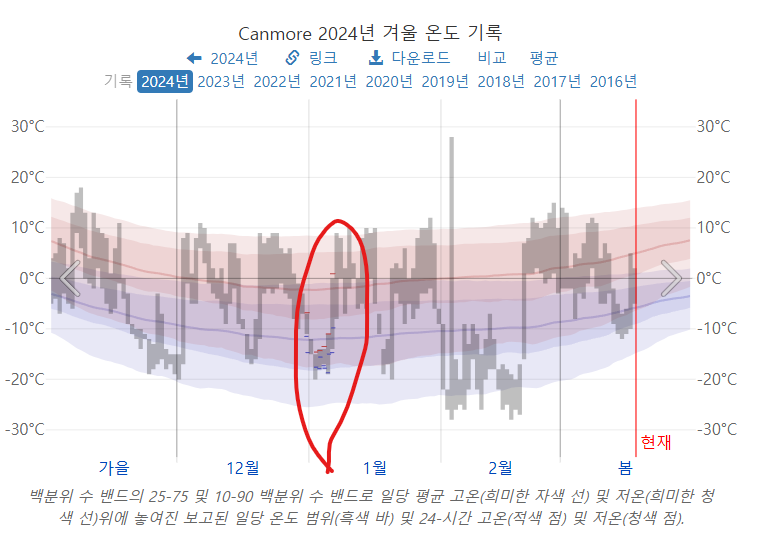

In [ ]:
# 1월달에 -32도인 값이 있다.
# 캐나다의 추운날씨를 확인해봐야 할것 같다.

# 위도 경도를 확인해봤을때 캐나다 앨버타주의 온도이고,
# 1월의 날씨를 확인해봤을때 -20도 까지 내려가는 지역이였다.
# 산이라고 특정지었을때, 충분히 -32도까지 내려갈수 있는 온도라고 판단된다.
canada_copy.sort_values(by="T2M", ascending=True)

,latitude,longitude,brightness,acq_date,confidence,bright_t31,frp,daynight,T2M,WS2M,RH2M,PRECTOTCORR,datetime
6748479,52.29392,-115.56995,324.04,2024-01-12,n,234.59,4.46,N,-32.89,1.08,96.18,0.0,2024-01-12 09:58:00
6748481,53.84555,-113.11894,328.10,2024-01-12,n,249.06,5.86,N,-32.89,1.08,96.18,0.0,2024-01-12 09:57:00
6748482,53.34371,-111.24908,322.86,2024-01-12,n,236.30,3.09,N,-32.89,1.08,96.18,0.0,2024-01-12 09:57:00
6748483,55.11763,-120.24883,333.86,2024-01-12,n,237.20,8.12,N,-32.89,1.08,96.18,0.0,2024-01-12 09:57:00
6748484,55.33794,-119.21937,320.59,2024-01-12,n,237.20,1.41,N,-32.89,1.08,96.18,0.0,2024-01-12 09:57:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082462,50.88396,-91.72086,325.12,2021-06-27,l,296.66,11.05,D,24.89,0.49,57.16,0.0,2021-06-27 20:04:00
2082463,49.09835,-123.01305,310.86,2021-06-27,n,293.49,1.25,N,24.89,0.49,57.16,0.0,2021-06-27 10:18:00
2082464,61.69617,-123.71448,335.20,2021-06-27,n,302.88,4.46,D,24.89,0.49,57.16,0.0,2021-06-27 21:49:00
2082458,61.70176,-123.70609,367.00,2021-06-27,h,304.56,210.96,D,24.89,0.49,57.16,0.0,2021-06-27 18:29:00


In [34]:
# 강수량의 최대치가 58.52mm인데 이는 이상치라고 볼수 없다. 
# 비가 많이 왔다고 판단된다.
canada_copy.sort_values(by="PRECTOTCORR", ascending=True)

,latitude,longitude,brightness,acq_date,confidence,bright_t31,frp,daynight,T2M,WS2M,RH2M,PRECTOTCORR,datetime
7383390,59.59191,-118.81586,336.74,2024-08-07,n,303.05,3.19,D,15.67,0.46,66.55,0.00,2024-08-07 20:39:00
5934312,60.82347,-115.97005,345.57,2023-08-27,n,302.06,5.32,D,16.04,0.50,66.43,0.00,2023-08-27 20:28:00
5934313,60.82257,-115.97799,325.56,2023-08-27,l,297.08,5.32,D,16.04,0.50,66.43,0.00,2023-08-27 20:28:00
5934314,60.81715,-116.02556,335.68,2023-08-27,n,302.23,4.55,D,16.04,0.50,66.43,0.00,2023-08-27 20:28:00
5934315,60.80082,-116.16756,340.85,2023-08-27,n,303.53,7.86,D,16.04,0.50,66.43,0.00,2023-08-27 20:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903426,49.63191,-122.57650,336.55,2017-10-24,n,285.97,9.44,D,5.56,0.45,98.99,58.52,2017-10-24 21:59:00
903427,49.55886,-118.18867,326.63,2017-10-24,n,283.66,8.08,D,5.56,0.45,98.99,58.52,2017-10-24 21:59:00
903428,49.63778,-122.58509,356.79,2017-10-24,l,288.64,9.44,D,5.56,0.45,98.99,58.52,2017-10-24 21:59:00
903430,49.99017,-118.33421,354.19,2017-10-24,n,280.19,19.00,D,5.56,0.45,98.99,58.52,2017-10-24 21:59:00


In [35]:
import numpy as np 

In [36]:
# 이상치라고 판단되는 값은 없지만
# "frp", "brightness", "bright_t31", "T2M", "WS2M", "RH2M", "PRECTOTCORR" 값들을
# 이상치 계산공식(IQR)을 적용해 보겠다.

list = ["frp", "brightness", "bright_t31", "T2M", "WS2M", "RH2M", "PRECTOTCORR"]

for i in list :

    q1, _, q3 = np.percentile(canada[i],[25,50,75])
    q1, q3


    iqr = q3 - q1
    iqr

    # min및 max 이상치 계산하기

    min_bound = q1 - (1.5 * iqr)
    max_bound = q3 + (1.5 * iqr)
    

    # 이상치 추출하기
    # min_bound 또는 max_bound의 값을 벗어난 데이터를 전체 컬럼의 갯수 조회

    c = (canada_copy[i] < min_bound) | (canada_copy[i] > max_bound)

    print(f"{i}의 IQR")
    print(f"min_bound : {min_bound} , max_bound : {max_bound}" )
    print(canada_copy[c].value_counts().sum())
    print("")

frp의 IQR
min_bound : -12.4 , max_bound : 25.6
1032527

brightness의 IQR
min_bound : 252.36500000000007 , max_bound : 398.00499999999994
14544

bright_t31의 IQR
min_bound : 263.6149999999999 , max_bound : 316.69500000000005
271559

T2M의 IQR
min_bound : 0.4650000000000034 , max_bound : 21.784999999999997
407682

WS2M의 IQR
min_bound : 0.03499999999999992 , max_bound : 0.7150000000000001
333733

RH2M의 IQR
min_bound : 54.115000000000016 , max_bound : 110.95499999999998
46341

PRECTOTCORR의 IQR
min_bound : -6.274999999999999 , max_bound : 10.645
447134



In [37]:
df_2015_01 = canada_copy[canada_copy['acq_date'].str.startswith('2015-01')]
df_2015_01

# 데이터가 너무 많기때문에
# 2015년1월의 데이터만 필터링하여 그래프를통해
# 상관관계를 분석해 보겠다.

,latitude,longitude,brightness,acq_date,confidence,bright_t31,frp,daynight,T2M,WS2M,RH2M,PRECTOTCORR,datetime
0,43.27457,-79.79796,340.37,2015-01-01,n,270.37,2.74,N,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
1,50.66671,-120.73180,304.51,2015-01-01,n,262.86,1.86,N,-1.62,0.98,99.26,3.70,2015-01-01 11:33:00
2,50.66734,-120.72754,311.48,2015-01-01,n,262.69,1.80,N,-1.62,0.98,99.26,3.70,2015-01-01 11:33:00
3,49.90158,-124.25547,301.94,2015-01-01,n,268.68,0.72,N,-1.62,0.98,99.26,3.70,2015-01-01 09:54:00
4,43.26389,-79.80871,320.93,2015-01-01,n,268.69,4.97,N,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,55.93647,-114.67339,320.52,2015-01-31,n,252.31,2.19,N,-9.83,0.70,99.05,0.33,2015-01-31 08:48:00
1349,54.08387,-107.91348,321.55,2015-01-31,n,246.84,3.63,N,-9.83,0.70,99.05,0.33,2015-01-31 08:48:00
1350,46.57682,-80.79353,334.37,2015-01-31,n,250.41,8.58,N,-9.83,0.70,99.05,0.33,2015-01-31 07:09:00
1351,43.85428,-78.91342,295.09,2015-01-31,n,254.43,0.77,N,-9.83,0.70,99.05,0.33,2015-01-31 07:09:00


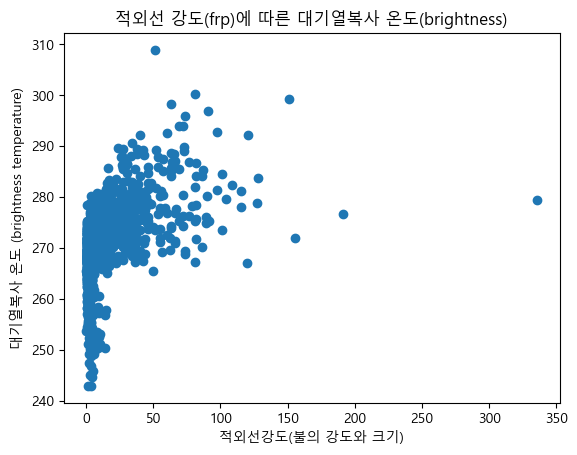

In [38]:
# 산점도 그리기(상관관계 분석)

plt.title("적외선 강도(frp)에 따른 대기열복사 온도(brightness)")
plt.scatter(df_2015_01["frp"], df_2015_01["bright_t31"])
plt.xlabel("적외선강도(불의 강도와 크기)")
plt.ylabel("대기열복사 온도 (brightness temperature)")

plt.show()

# 해석
# frp가 0~2000이고, brightness이 250~400사이인 값들에 집중분포되어있다.


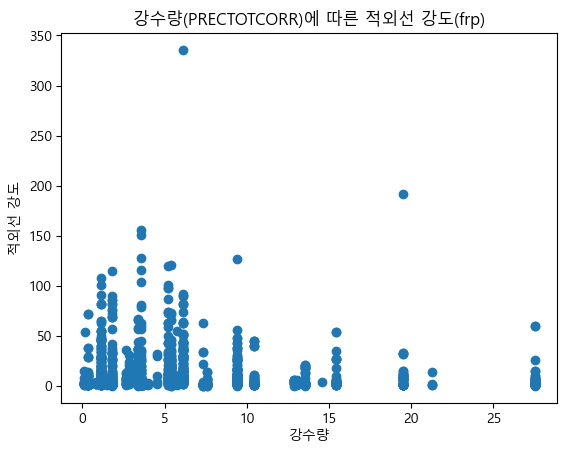

In [39]:
# 산점도 그리기(상관관계 분석)

plt.title("강수량(PRECTOTCORR)에 따른 적외선 강도(frp)")
plt.scatter(df_2015_01["PRECTOTCORR"], df_2015_01["frp"])
plt.xlabel("강수량")
plt.ylabel("적외선 강도")
plt.show()

# 강수량이 작을수록 적외선 강도 높다.
# 비에 의해서 적외선강도(불의크기가) 완화되었다고 판단된다.

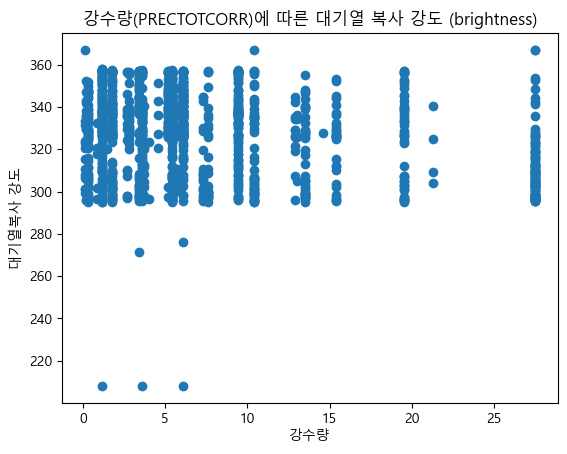

In [40]:
# 산점도 그리기(상관관계 분석)

plt.title("강수량(PRECTOTCORR)에 따른 대기열 복사 강도 (brightness)")
plt.scatter(df_2015_01["PRECTOTCORR"], df_2015_01["brightness"])
plt.xlabel("강수량")
plt.ylabel("대기열복사 강도")
plt.show()

# 강수량과 대기열복사강도 사이의 상관관계는 미미한것으로 판단된다.

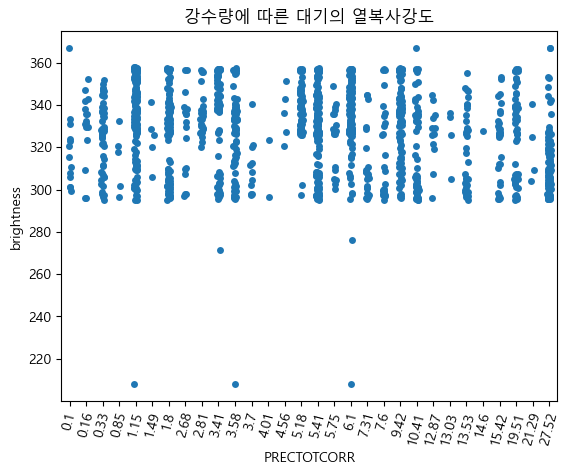

In [41]:
plt.title("강수량에 따른 대기의 열복사강도")
sns.stripplot(x='PRECTOTCORR', y='brightness', data=df_2015_01,)
plt.xticks(rotation=75)

plt.show()

# 상관관계가 미미한것으로 판단된다.

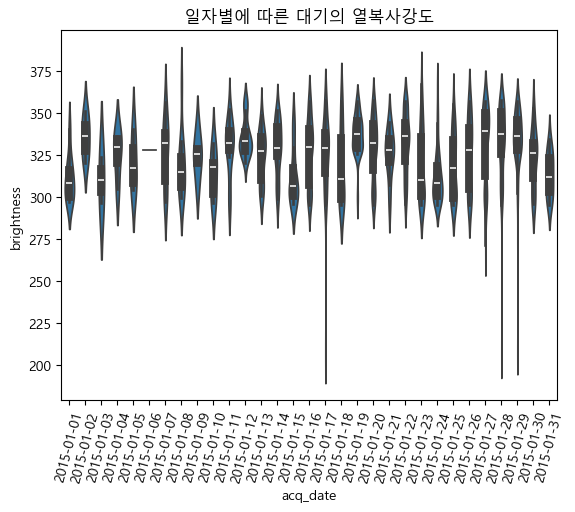

In [42]:
# 박스플롯을 다른 형태로 나타낸다. 바이올린 형태
plt.title("일자별에 따른 대기의 열복사강도")
sns.violinplot(x='acq_date', y='brightness', data=df_2015_01)

plt.xticks(rotation=75)
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 파일 경로 설정 (사용자의 SHP 파일 경로로 변경)
shapefile_path = "./shape_data/DL_FIRE_SV-C2_590066/fire_archive_SV-C2_590066.shp"

# Shapefile 불러오기
gdf = gpd.read_file(shapefile_path)

# 지도 시각화
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, cmap='OrRd', edgecolor='black', alpha=0.7)

# 제목 추가
ax.set_title("Fire Detection Map", fontsize=14)

# 축 제거 (지도만 보이게)
ax.set_xticks([])
ax.set_yticks([])

# 시각화 실행
plt.show()

In [43]:
canada_copy

,latitude,longitude,brightness,acq_date,confidence,bright_t31,frp,daynight,T2M,WS2M,RH2M,PRECTOTCORR,datetime
0,43.27457,-79.79796,340.37,2015-01-01,n,270.37,2.74,N,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
1,50.66671,-120.73180,304.51,2015-01-01,n,262.86,1.86,N,-1.62,0.98,99.26,3.70,2015-01-01 11:33:00
2,50.66734,-120.72754,311.48,2015-01-01,n,262.69,1.80,N,-1.62,0.98,99.26,3.70,2015-01-01 11:33:00
3,49.90158,-124.25547,301.94,2015-01-01,n,268.68,0.72,N,-1.62,0.98,99.26,3.70,2015-01-01 09:54:00
4,43.26389,-79.80871,320.93,2015-01-01,n,268.69,4.97,N,-1.62,0.98,99.26,3.70,2015-01-01 06:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8287497,55.25953,-119.95911,296.75,2025-02-28,n,265.34,1.97,N,-1.95,0.45,94.49,2.45,2025-02-28 11:44:00
8287498,55.25550,-119.95906,324.07,2025-02-28,n,267.13,2.32,N,-1.95,0.45,94.49,2.45,2025-02-28 11:44:00
8287499,55.70979,-119.80482,298.73,2025-02-28,n,269.30,0.59,N,-1.95,0.45,94.49,2.45,2025-02-28 11:44:00
8287500,55.12304,-119.04024,304.52,2025-02-28,n,264.53,0.76,N,-1.95,0.45,94.49,2.45,2025-02-28 11:44:00


# 상관관계 검증

In [56]:
# 상관관계 검증을 하기위해서 원핫인코딩을 사용할 것이다.
# 범주형 데이터들을 원핫인코딩하기위해서 acq_date의 데이터 타입을 datetime 으로 변환하였다.
canada_copy["acq_date"] = pd.to_datetime(canada_copy["acq_date"])

In [ ]:
# 범주형 데이터인 confidence와 daynight 컬럼을 원핫인코딩 하였다.
# 원-핫 인코딩 처리된 결과값을 숫자로 변환 하였다. 
# 상관관계 검증을 하기위함
canada2 = pd.get_dummies(canada_copy, dtype=int)
canada2.head()

,latitude,longitude,brightness,acq_date,bright_t31,frp,T2M,WS2M,RH2M,PRECTOTCORR,datetime,confidence_h,confidence_l,confidence_n,daynight_D,daynight_N
0,43.27457,-79.79796,340.37,2015-01-01,270.37,2.74,-1.62,0.98,99.26,3.7,2015-01-01 06:33:00,0,0,1,0,1
1,50.66671,-120.73180,304.51,2015-01-01,262.86,1.86,-1.62,0.98,99.26,3.7,2015-01-01 11:33:00,0,0,1,0,1
2,50.66734,-120.72754,311.48,2015-01-01,262.69,1.80,-1.62,0.98,99.26,3.7,2015-01-01 11:33:00,0,0,1,0,1
3,49.90158,-124.25547,301.94,2015-01-01,268.68,0.72,-1.62,0.98,99.26,3.7,2015-01-01 09:54:00,0,0,1,0,1
4,43.26389,-79.80871,320.93,2015-01-01,268.69,4.97,-1.62,0.98,99.26,3.7,2015-01-01 06:33:00,0,0,1,0,1


In [65]:
X = canada2[["brightness", "bright_t31", "T2M", "WS2M", "RH2M","PRECTOTCORR","confidence_h",\
    "confidence_l","confidence_n","daynight_D","daynight_N"]]
y = canada2["frp"]

In [ ]:
# 상관관계 분석
# 스피어만 상관관계 검증

### 라이브러리 정의
from scipy.stats import spearmanr

for value in X:
     statistic, pvalue = spearmanr(X[value],y)
     if pvalue<0.05:
        print(f" 상관관계 계수 {statistic:.3f}, p-value {pvalue} 유의미 여부 판단 : ({value})독립변수는 종속변수(FRP)에 대해서 유의미하다 ")
     else:
         print(f" 상관관계 계수 {statistic:.3f}, p-value {pvalue} 유의미 여부 판단 : ({value})독립변수는 종속변수(FRP)에 대해서 유의미하지않다  ")




 상관관계 계수 0.825, p-value 0.0 유의미 여부 판단 : (brightness)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 0.599, p-value 0.0 유의미 여부 판단 : (bright_t31)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 0.002, p-value 2.3987977605724575e-07 유의미 여부 판단 : (T2M)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 0.063, p-value 0.0 유의미 여부 판단 : (WS2M)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 -0.032, p-value 0.0 유의미 여부 판단 : (RH2M)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 -0.029, p-value 0.0 유의미 여부 판단 : (PRECTOTCORR)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 0.289, p-value 0.0 유의미 여부 판단 : (confidence_h)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 0.194, p-value 0.0 유의미 여부 판단 : (confidence_l)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 -0.354, p-value 0.0 유의미 여부 판단 : (confidence_n)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 0.697, p-value 0.0 유의미 여부 판단 : (daynight_D)독립변수는 종속변수(FRP)에 대해서 유의미하다 
 상관관계 계수 -0.697, p-value 0.0 유의미 여부 판단 : (daynight_N)독립변수는 종속변수(FRP)에 대해서 유의미하다 


In [ ]:
# 상관관계 분석
# 피어스만 상관관계 검증

### 라이브러리 정의
from scipy.stats import pearsonr

for value in X:
     statistic, pvalue = pearsonr(X[value],y)
     if pvalue<0.05:
        print(f" 상관관계 계수 {statistic:.3f}, p-value {pvalue} 유의미 여부 판단 : ({value})독립변수는 종속변수(FRP)에 대해서 유의미하다 ")
     else:
         print(f" 상관관계 계수 {statistic:.3f}, p-value {pvalue} 유의미 여부 판단 : ({value})독립변수는 종속변수(FRP)에 대해서 유의미하지않다  ")


In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


# 산불 면적 계산 (K = 0.25 사용)
df_2015_01["fire_area_ha"] = df_2015_01["frp"] * 0.25

# 지도 시각화를 위해 GeoDataFrame 변환
gdf = gpd.GeoDataFrame(df_2015_01, geometry=[Point(xy) for xy in zip(df_2015_01.longitude, df_2015_01.latitude)])

# 세계 지도 데이터 로드 (수동 다운로드 필요 없음)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) 

# 지도 시각화
fig, ax = plt.subplots(figsize=(8, 6))
world.plot(ax=ax, color="lightgrey")

gdf.plot(ax=ax, color="red", markersize=df_2015_01["fire_area_ha"] * 20, alpha=0.6)  # 면적에 따라 크기 조절
plt.title("산불 발생 위치 및 면적")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18880\3611168196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015_01["fire_area_ha"] = df_2015_01["frp"] * 0.25


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.